In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc ,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df1=pd.read_csv("/content/users.csv")
df2=pd.read_csv("/content/fusers.csv")

In [ ]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1481 non-null   int64  
 1   name                                1481 non-null   object 
 2   screen_name                         1481 non-null   object 
 3   statuses_count                      1481 non-null   int64  
 4   followers_count                     1481 non-null   int64  
 5   friends_count                       1481 non-null   int64  
 6   favourites_count                    1481 non-null   int64  
 7   listed_count                        1481 non-null   int64  
 8   created_at                          1481 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                1481 non-null   object 
 11  time_zone                           1063 no

In [ ]:
print(df1.describe())
print(df2.describe())

                 id  statuses_count  followers_count  friends_count  \
count  1.481000e+03     1481.000000      1481.000000    1481.000000   
mean   4.000432e+08     3140.782579       690.922350     403.128292   
std    2.961304e+08     6391.957957     11058.508986     610.572368   
min    3.610511e+06        3.000000         0.000000       0.000000   
25%    1.572905e+08      315.000000        45.000000     115.000000   
50%    3.822478e+08      992.000000       102.000000     226.000000   
75%    5.229255e+08     3029.000000       259.000000     437.000000   
max    1.219743e+09    79876.000000    408372.000000   12773.000000   

       favourites_count  listed_count  default_profile  default_profile_image  \
count       1481.000000   1481.000000            397.0                    4.0   
mean         439.611749      5.360567              1.0                    1.0   
std         1970.556008     32.183232              0.0                    0.0   
min            0.000000      0.00000

In [ ]:
print(df1.columns)
print(df2.columns)

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')
Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled',

In [ ]:
#print(df1.info())
print(df1.isnull().sum())
#print(df2.info())
print(df2.isnull().sum())



id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   1018
lang                                     0
time_zone                              418
location                               492
default_profile                       1084
default_profile_image                 1477
geo_enabled                            762
profile_image_url                        0
profile_banner_url                     496
profile_use_background_image            58
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [ ]:
# Drop columns with more than 50% missing values
threshold = 0.5

df1 = df1.loc[:, df1.isnull().mean() < threshold]
df2 = df2.loc[:, df2.isnull().mean() < threshold]

# Impute missing values for numerical columns
for col in df1.select_dtypes(include=['float64', 'int64']).columns:
    df1[col].fillna(df1[col].median(), inplace=True)

for col in df2.select_dtypes(include=['float64', 'int64']).columns:
    df2[col].fillna(df2[col].median(), inplace=True)

# Impute missing values for categorical columns
for col in df1.select_dtypes(include=['object']).columns:
    df1[col].fillna('Unknown', inplace=True)

for col in df2.select_dtypes(include=['object']).columns:
    df2[col].fillna('Unknown', inplace=True)


<ipython-input-7-5d5804a9c07e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)
<ipython-input-7-5d5804a9c07e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].fillna(df1[col].median(), inplace=True)
<ipython-input-7-5d5804a9c07e>:12: FutureWarning: A value is trying to be set on a copy

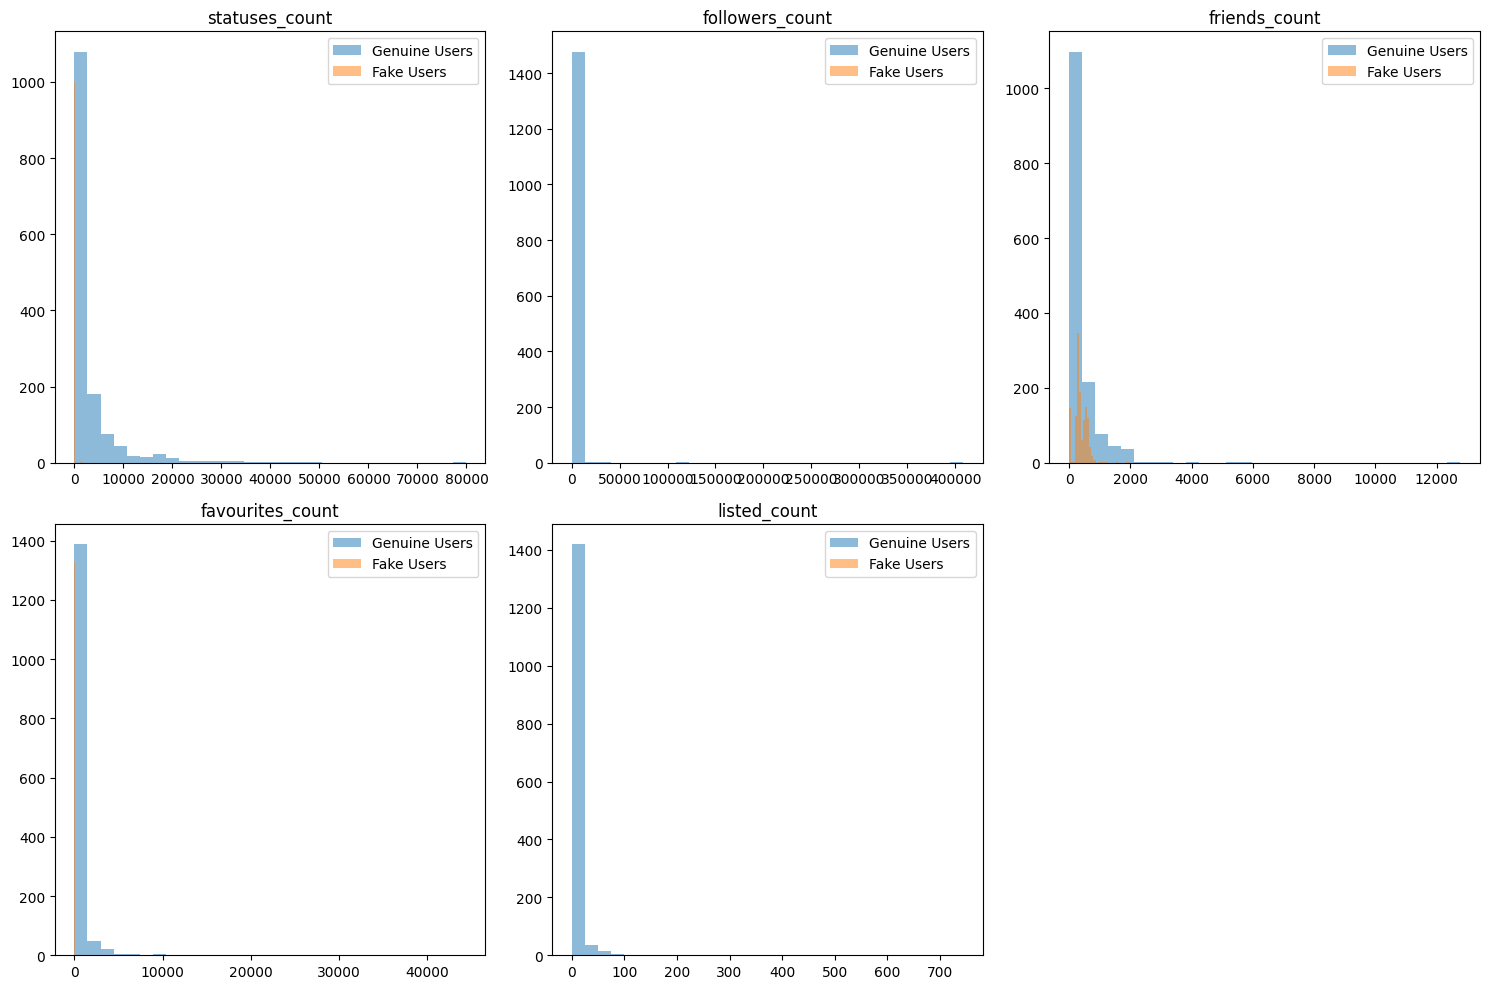

In [ ]:
#Histograms for Numerical Features:

#Compare distributions for statuses_count, followers_count, friends_count, favourites_count, and listed_count.
import matplotlib.pyplot as plt

numerical_features = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df1[feature], bins=30, alpha=0.5, label='Genuine Users')
    plt.hist(df2[feature], bins=30, alpha=0.5, label='Fake Users')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()


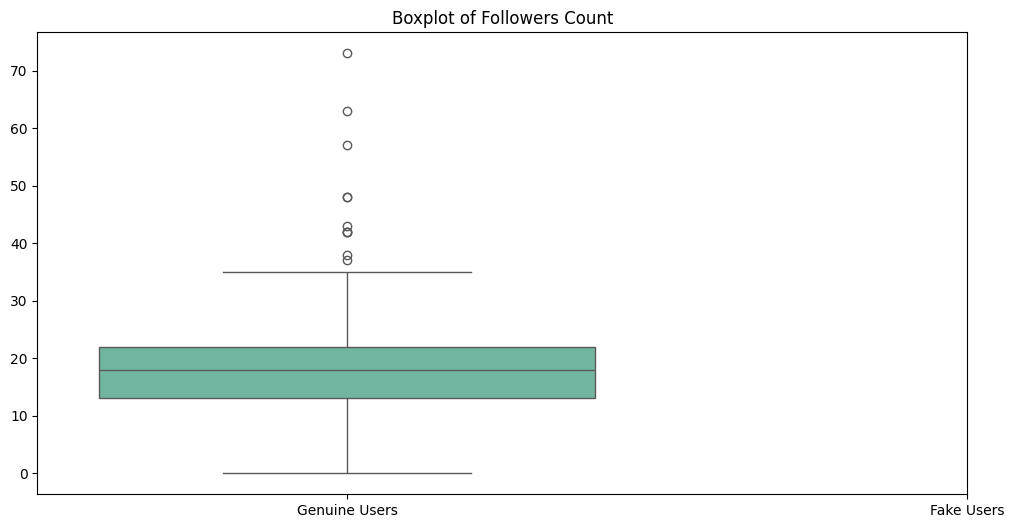

In [ ]:
#Boxplots for Outliers:

#Identify outliers in follower counts and statuses for both datasets.

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=[df1['followers_count'], df2['followers_count']], palette='Set2')
plt.xticks([0, 1], ['Genuine Users', 'Fake Users'])
plt.title('Boxplot of Followers Count')
plt.show()


In [ ]:
df1.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'lang', 'time_zone', 'location', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'description', 'updated', 'dataset'],
      dtype='object')

In [ ]:
df2.columns


Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'lang', 'location', 'default_profile', 'profile_image_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'description', 'updated', 'dataset'],
      dtype='object')

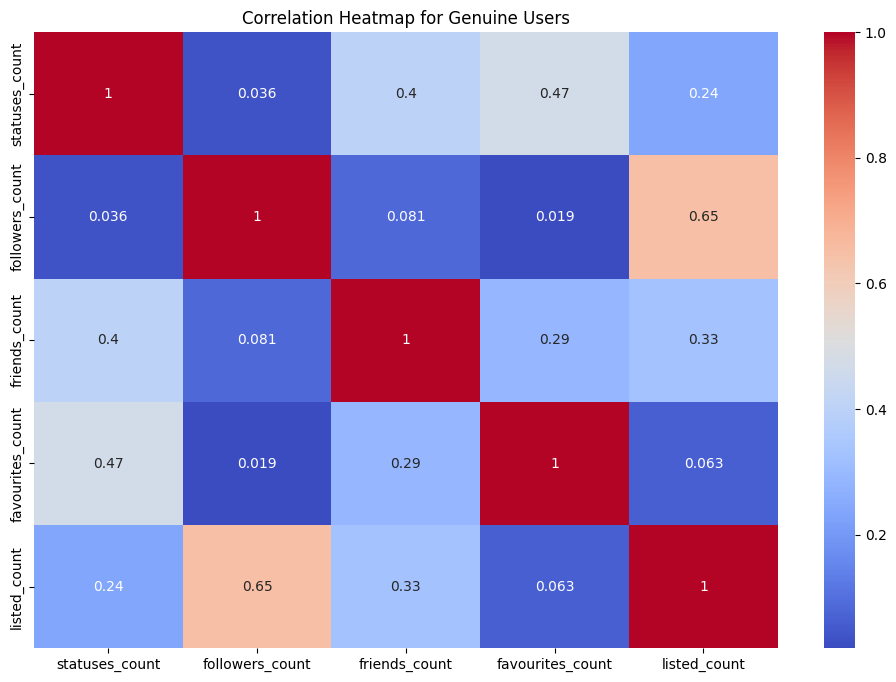

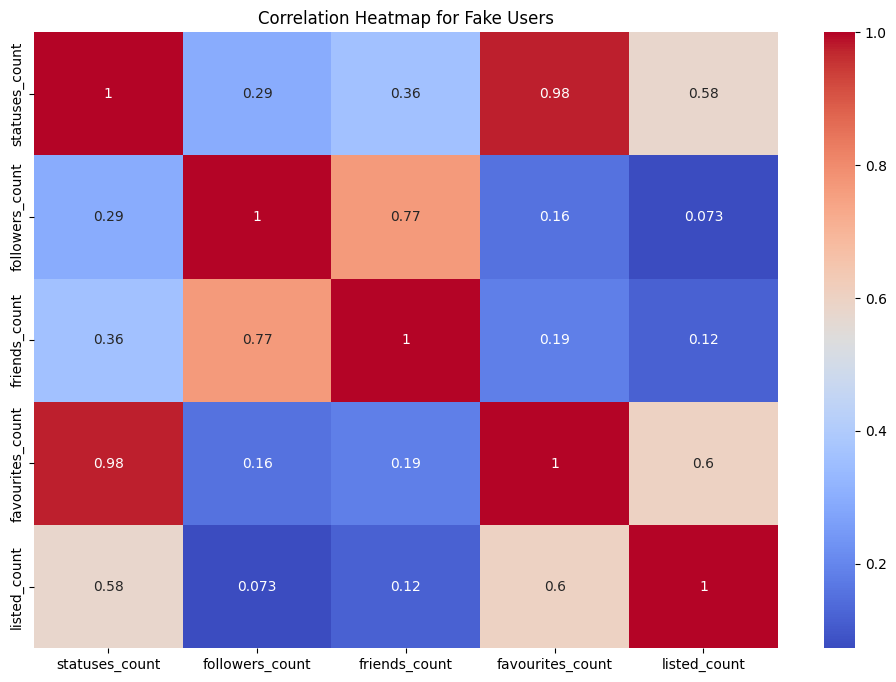

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix_df1 = df1[numerical_features].corr()
sns.heatmap(correlation_matrix_df1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Genuine Users')
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix_df2 = df2[numerical_features].corr()
sns.heatmap(correlation_matrix_df2, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Fake Users')
plt.show()


<ipython-input-11-3dac107bcce8>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['created_at'] = pd.to_datetime(df1['created_at'])
<ipython-input-11-3dac107bcce8>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['created_at'] = pd.to_datetime(df2['created_at'])
<ipython-input-11-3dac107bcce8>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1.set_index('created_at').resample('M').size().plot(label='Genuine Users')
<ipython-input-11-3dac107bcce8>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2.set_index('created_at').resample('M').size().plot(label='Fake Users')


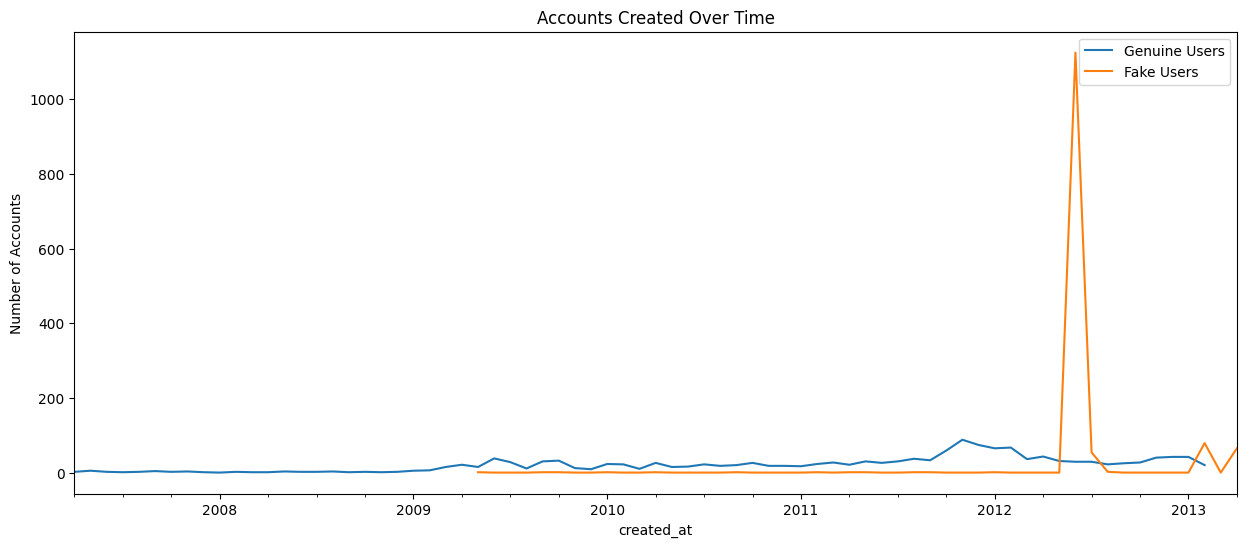

In [ ]:
#Time Series Analysis
#Account Creation Date Analysis:
#Convert created_at to datetime and analyze the number of accounts created over time for both datasets.


df1['created_at'] = pd.to_datetime(df1['created_at'])
df2['created_at'] = pd.to_datetime(df2['created_at'])

plt.figure(figsize=(15, 6))
df1.set_index('created_at').resample('M').size().plot(label='Genuine Users')
df2.set_index('created_at').resample('M').size().plot(label='Fake Users')
plt.title('Accounts Created Over Time')
plt.ylabel('Number of Accounts')
plt.legend()
plt.show()


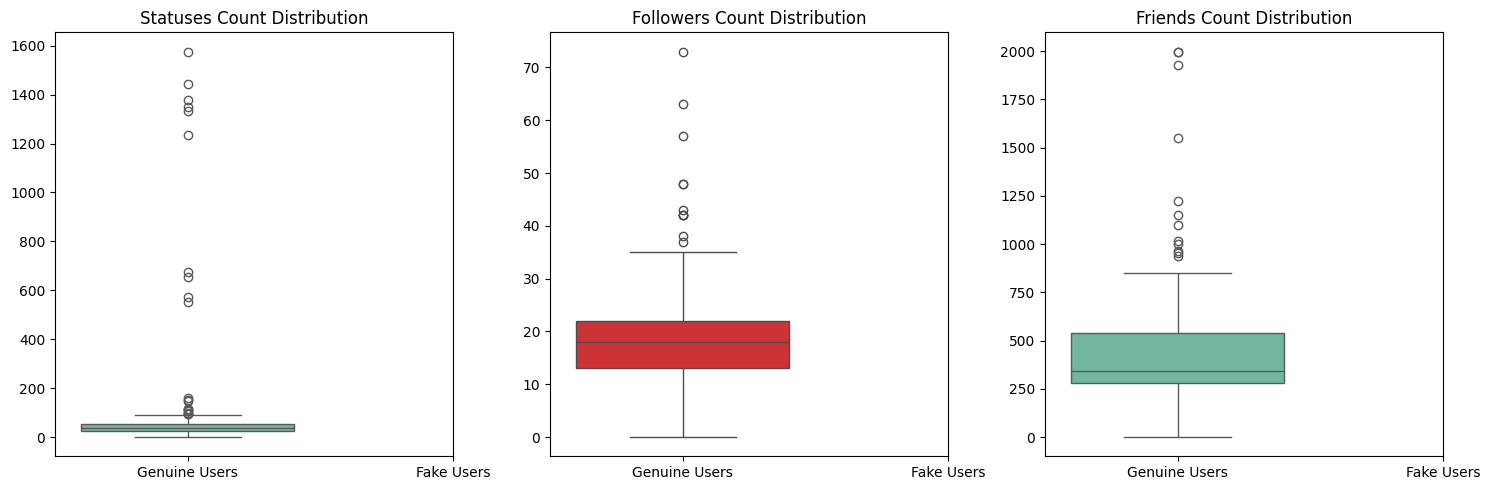

In [ ]:
plt.figure(figsize=(15, 5))

# Subplot for statuses_count
plt.subplot(1, 3, 1)
sns.boxplot(data=[df1['statuses_count'], df2['statuses_count']], palette='Set2')
plt.xticks([0, 1], ['Genuine Users', 'Fake Users'])
plt.title('Statuses Count Distribution')

# Subplot for followers_count
plt.subplot(1, 3, 2)
sns.boxplot(data=[df1['followers_count'], df2['followers_count']], palette='Set1')
plt.xticks([0, 1], ['Genuine Users', 'Fake Users'])
plt.title('Followers Count Distribution')

# Subplot for friends_count
plt.subplot(1, 3, 3)
sns.boxplot(data=[df1['friends_count'], df2['friends_count']], palette='Set2')
plt.xticks([0, 1], ['Genuine Users', 'Fake Users'])
plt.title('Friends Count Distribution')

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
def read_datasets():
    """ Reads users profile from csv files """
    users = pd.read_csv("/content/users.csv")
    fake_users = pd.read_csv("/content/fusers.csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([users,fake_users])
    y=len(fake_users)*[0] + len(users)*[1]
    return x,y

In [ ]:
!pip install gender-guesser

In [ ]:
import pandas as pd
import gender_guesser.detector as gender

def predict_sex(name):
    sex_predictor = gender.Detector(case_sensitive=False)  # Remove unknown_value
    first_name = name.str.split(' ').str.get(0)
    sex = first_name.apply(sex_predictor.get_gender)
    sex_dict = {'female': -2, 'mostly_female': -1, 'unknown': 0, 'mostly_male': 1, 'male': 2}
    # Convert to numeric, handling errors by coercing to NaN and then filling NaN with 0
    sex_code = pd.to_numeric(sex.map(sex_dict), errors='coerce').fillna(0).astype(int)
    return sex_code


In [ ]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))
    lang_dict = { name : i for i, name in lang_list }
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)
    x.loc[:,'sex_code']=predict_sex(x['name'])
    feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','sex_code','lang_code']
    x=x.loc[:,feature_columns_to_use]
    return x

In [ ]:

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:

def plot_roc_curve(y_test, y_pred):

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print("False Positive rate: ", false_positive_rate)
    print("True Positive rate: ", true_positive_rate)


    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()




In [ ]:
!pip install neurolab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=46317e4dc2aff282a0e8b53270ae259b98f0464e708626e382cc9d819d36c57f
  Stored in directory: /root/.cache/pip/wheels/5e/ee/92/6e99c58786234fd536e400ac1f98af9cf9b43ee4ac8fec4204
Successfully built neurolab


In [ ]:
import neurolab as nl
import os # import os module
import numpy as np
import pandas as pd
from neurolab.trans import TanSig, PureLin  # Explicitly import transfer functions


def train(X, y):
    """ Trains and predicts dataset with a Neural Network classifier """
    X = X.loc[:, X.var() != 0]

    # Create input and target arrays
    input_data = X.values.astype(float)  # Convert input data to float
    target_data = np.array([y]).reshape(-1, 1)  # Reshape target data for neurolab

    # Define minimum and maximum values for each input feature
    min_max_values = [[min(X.iloc[:, i]), max(X.iloc[:, i])] for i in range(X.shape[1])]

    # Create a new feedforward neural network with PureLin transfer function
    fnn = nl.net.newff(min_max_values, [5, 1], [TanSig(), PureLin()])

    # Train the neural network
    error = fnn.train(input_data, target_data, epochs=100, show=10, goal=0.01)

    # Make predictions on the input data
    predictions = fnn.sim(input_data)

    # Convert predictions to binary classes (0 or 1)
    predicted_classes = [1 if pred[0] >= 0.5 else 0 for pred in predictions]

    return target_data.flatten(), predicted_classes  # Return target and predicted classes

In [ ]:
!pip install neurolab
!pip install numpy==1.24.4  # Downgrade NumPy

In [ ]:
def percentError(y_pred, y_actual):
    """
    Calculates the percentage error between predicted and actual values.
    """
    error = np.sum(np.abs(y_pred - y_actual)) / len(y_actual) * 100  # Ensure error calculation is correct
    return error

In [ ]:
print("reading datasets.....\n")
x,y=read_datasets()
x.describe()

reading datasets.....



,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,2.818000e+03,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,1728.0,8.0,721.0,2760.0,489.0,1069.000000,0.0,0.0
mean,5.374889e+08,1672.198368,371.105039,395.363023,234.541164,2.818666,1.0,1.0,1.0,1.0,1.0,1478.391020,NaN,NaN
std,2.977005e+08,4884.669157,8022.631339,465.694322,1445.847248,23.480430,0.0,0.0,0.0,0.0,0.0,8108.211889,NaN,NaN
min,3.610511e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,3.620867e+08,35.000000,17.000000,168.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,6.162253e+08,77.000000,26.000000,306.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,6.177673e+08,1087.750000,111.000000,519.000000,37.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.391998e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [ ]:
print("extracting featues.....\n")
x=extract_features(x)
print(x.columns)
print(x.describe())


extracting featues.....

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count     sex_code    lang_code  
count   2818.000000  2818.000000  2818.000000  
mean       2.818666    -0.191270     2.851313  
std

In [ ]:
import neurolab as nl
print("training datasets.......\n")
y_test,y_pred =train(x,y)


training datasets.......

Epoch: 10; Error: 197.48242381169374;
Epoch: 20; Error: 163.8235456953503;
Epoch: 30; Error: 151.56715613518875;
Epoch: 40; Error: 142.8731623856153;
Epoch: 50; Error: 129.2256091534837;
Epoch: 60; Error: 121.77702116163665;
Epoch: 70; Error: 120.25294300088753;
Epoch: 80; Error: 120.03624734255916;
Epoch: 90; Error: 119.90543647796204;
Epoch: 100; Error: 119.83183944833345;
The maximum number of train epochs is reached


In [ ]:
from sklearn.metrics import accuracy_score
print('Classification Accuracy on Test dataset: ') ,accuracy_score(y_test, y_pred)

Classification Accuracy on Test dataset: 


(None, 0.9131205673758865)

In [ ]:
print ('Percent Error on Test dataset: ' ),percentError(y_pred,y_test)

Percent Error on Test dataset: 


(None, 28263.829787234044)

Confusion matrix, without normalization
[[259  11]
 [ 38 256]]


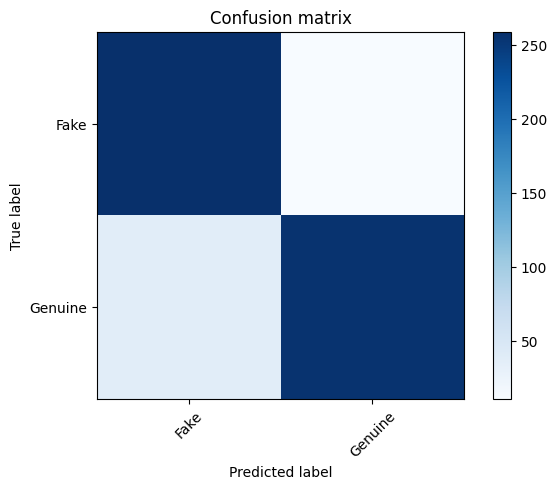

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.95925926 0.04074074]
 [0.1292517  0.8707483 ]]


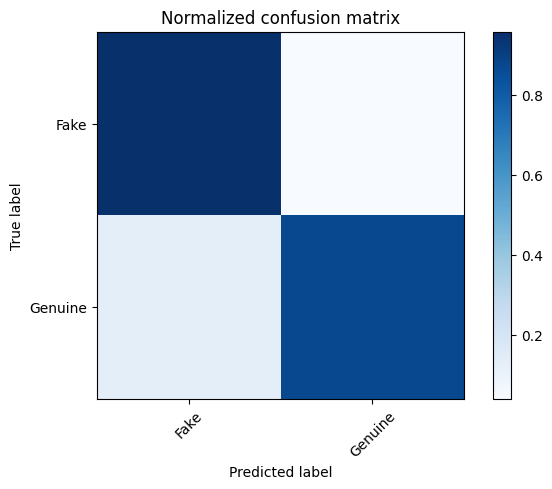

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.87      0.96      0.91       270
     Genuine       0.96      0.87      0.91       294

    accuracy                           0.91       564
   macro avg       0.92      0.92      0.91       564
weighted avg       0.92      0.91      0.91       564



In [ ]:
s=roc_auc_score(y_test, y_pred)
print("roc_auc_score : "),s




roc_auc_score : 


(None, 0.9150037792894936)

False Positive rate:  [0.         0.04074074 1.        ]
True Positive rate:  [0.        0.8707483 1.       ]


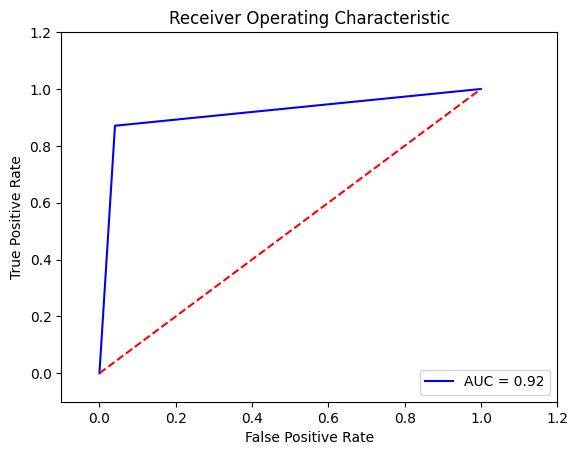

In [ ]:
# In[17]:

plot_roc_curve(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)

# Assuming y_pred contains the predictions for a single model
y_true = y_test  # True labels
predictions = y_pred  # Predictions for the model

# Initialize a dictionary to hold the metrics
metrics = {}

# Calculate metrics for the model
# Using 'Single Model' as a key for the metrics dictionary
metrics['NN'] = {
    "Accuracy": accuracy_score(y_true, predictions),
    "Precision": precision_score(y_true, predictions),
    "Recall": recall_score(y_true, predictions),
    "F1 Score": f1_score(y_true, predictions),
    "ROC-AUC": roc_auc_score(y_true, predictions),
    "MSE": mean_squared_error(y_true, predictions),
    "RMSE": np.sqrt(mean_squared_error(y_true, predictions)),
    "R-squared": r2_score(y_true, predictions)
}

# Print the results
for model, values in metrics.items():
    print(f"{model}:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.2f}")
    print()


NN:
  Accuracy: 0.91
  Precision: 0.96
  Recall: 0.87
  F1 Score: 0.91
  ROC-AUC: 0.92
  MSE: 0.09
  RMSE: 0.29
  R-squared: 0.65



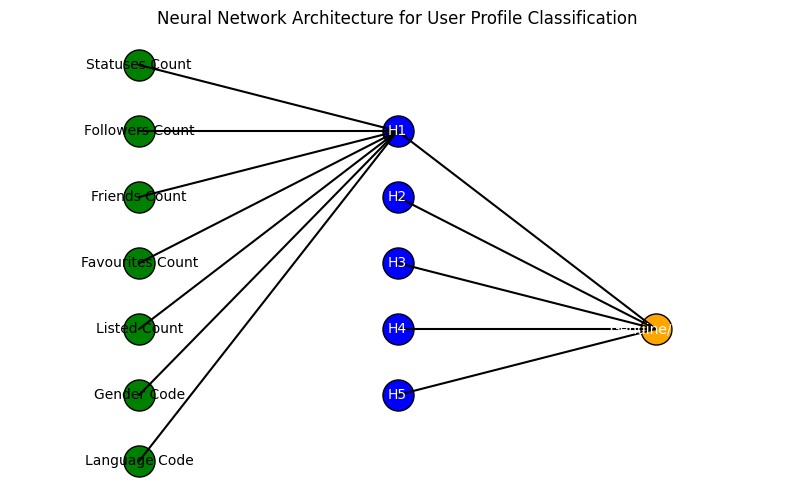

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw the neural network architecture
def draw_neural_network():
    plt.figure(figsize=(10, 6))

    # Input layer
    input_labels = ['Statuses Count', 'Followers Count', 'Friends Count',
                    'Favourites Count', 'Listed Count', 'Gender Code',
                    'Language Code']

    for i in range(len(input_labels)):
        plt.scatter(1, len(input_labels) - i, s=500, color='green', edgecolor='black')
        plt.text(1, len(input_labels) - i, input_labels[i],
                 ha='center', va='center', color='black', fontsize=10)

    # Hidden layer
    hidden_labels = ['H1', 'H2', 'H3', 'H4', 'H5']

    for i in range(len(hidden_labels)):
        plt.scatter(2, len(hidden_labels) - i + 1, s=500, color='blue', edgecolor='black')
        plt.text(2, len(hidden_labels) - i + 1, hidden_labels[i],
                 ha='center', va='center', color='white', fontsize=10)

    # Output layer
    plt.scatter(3, 3, s=500, color='orange', edgecolor='black')
    plt.text(3, 3, 'Genuine/Fake', ha='center', va='center', color='white', fontsize=10)

    # Draw lines between layers
    for i in range(len(input_labels)):
        plt.plot([1, 2], [len(input_labels) - i, len(hidden_labels) + 1], color='black')

    for i in range(len(hidden_labels)):
        plt.plot([2, 3], [len(hidden_labels) - i + 1, 3], color='black')

    # Set limits and remove axes
    plt.xlim(0.5, 3.5)
    plt.ylim(0.5, 7.5)
    plt.axis('off')

    plt.title('Neural Network Architecture for User Profile Classification')
    plt.show()

# Call the function to draw the neural network
draw_neural_network()


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Function for training using Gradient Boosting
def train_gradient_boosting(X, y):
    """ Trains and predicts dataset with Gradient Boosting Classifier """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)

    return y_test, y_pred

# Usage
y_test, y_pred = train_gradient_boosting(x, y)
print('Gradient Boosting Classification Accuracy:', accuracy_score(y_test, y_pred))


Gradient Boosting Classification Accuracy: 0.9237588652482269


roc_auc_score : 
False Positive rate:  [0.         0.02222222 1.        ]
True Positive rate:  [0.         0.87414966 1.        ]


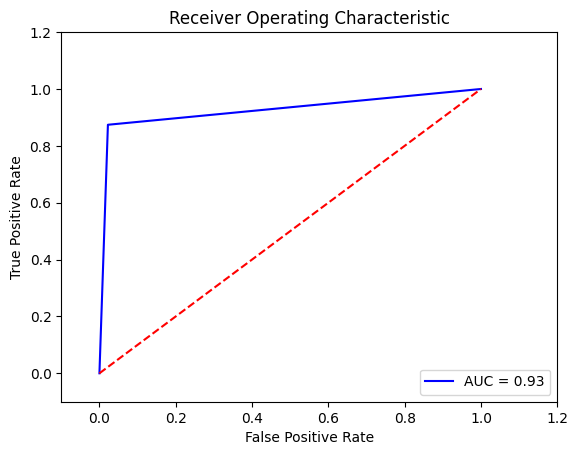

In [ ]:
s=roc_auc_score(y_test, y_pred)
print("roc_auc_score : "),s
plot_roc_curve(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)

# Assuming y_pred contains the predictions for a single model
y_true = y_test  # True labels
predictions = y_pred  # Predictions for the model

# Initialize a dictionary to hold the metrics
metrics = {}

# Calculate metrics for the model
# Using 'Single Model' as a key for the metrics dictionary
metrics['GRADIENT BOOSTING'] = {
    "Accuracy": accuracy_score(y_true, predictions),
    "Precision": precision_score(y_true, predictions),
    "Recall": recall_score(y_true, predictions),
    "F1 Score": f1_score(y_true, predictions),
    "ROC-AUC": roc_auc_score(y_true, predictions),
    "MSE": mean_squared_error(y_true, predictions),
    "RMSE": np.sqrt(mean_squared_error(y_true, predictions)),
    "R-squared": r2_score(y_true, predictions)
}

# Print the results
for model, values in metrics.items():
    print(f"{model}:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.2f}")
    print()

GRADIENT BOOSTING:
  Accuracy: 0.92
  Precision: 0.98
  Recall: 0.87
  F1 Score: 0.92
  ROC-AUC: 0.93
  MSE: 0.08
  RMSE: 0.28
  R-squared: 0.69



XGBOOST CLASSIFIER

In [ ]:
import xgboost as xgb

# Function for training using XGBoost
def train_xgboost(X, y):
    """ Trains and predicts dataset with XGBoost Classifier """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    return y_test, y_pred

# Usage
y_test, y_pred = train_xgboost(x, y)
print('XGBoost Classification Accuracy:', accuracy_score(y_test, y_pred))


XGBoost Classification Accuracy: 0.9290780141843972


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


roc_auc_score : 
False Positive rate:  [0.         0.01111111 1.        ]
True Positive rate:  [0.         0.87414966 1.        ]


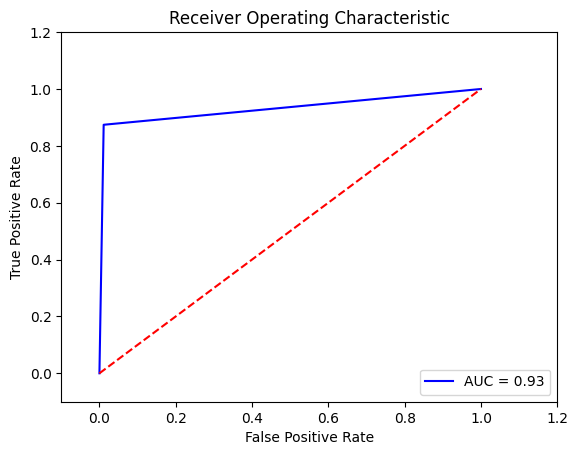

In [ ]:
s=roc_auc_score(y_test, y_pred)
print("roc_auc_score : "),s
plot_roc_curve(y_test, y_pred)


In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)

# Assuming y_pred contains the predictions for a single model
y_true = y_test  # True labels
predictions = y_pred  # Predictions for the model

# Initialize a dictionary to hold the metrics
metrics = {}

# Calculate metrics for the model
# Using 'Single Model' as a key for the metrics dictionary
metrics['XGBOOSTING'] = {
    "Accuracy": accuracy_score(y_true, predictions),
    "Precision": precision_score(y_true, predictions),
    "Recall": recall_score(y_true, predictions),
    "F1 Score": f1_score(y_true, predictions),
    "ROC-AUC": roc_auc_score(y_true, predictions),
    "MSE": mean_squared_error(y_true, predictions),
    "RMSE": np.sqrt(mean_squared_error(y_true, predictions)),
    "R-squared": r2_score(y_true, predictions)
}

# Print the results
for model, values in metrics.items():
    print(f"{model}:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.2f}")
    print()

XGBOOSTING:
  Accuracy: 0.93
  Precision: 0.99
  Recall: 0.87
  F1 Score: 0.93
  ROC-AUC: 0.93
  MSE: 0.07
  RMSE: 0.27
  R-squared: 0.72



REVIEW 3

Deep Learning Model using TensorFlow/Keras

In [ ]:
!pip install numpy==1.25.2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

# Function for training using Deep Learning
def train_deep_learning(X, y):
    """ Trains and predicts dataset with a Deep Learning model """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert X_train and y_train to NumPy arrays
    X_train = X_train.values
    y_train = np.array(y_train)

    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

    return y_test, y_pred

# Usage
y_test, y_pred = train_deep_learning(x, y)
print('Deep Learning Classification Accuracy:', accuracy_score(y_test, y_pred))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5132 - loss: 68.3070 - val_accuracy: 0.9157 - val_loss: 6.0726
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9126 - loss: 8.7289 - val_accuracy: 0.9335 - val_loss: 4.9899
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9154 - loss: 6.3399 - val_accuracy: 0.9268 - val_loss: 3.1741
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 2.6952 - val_accuracy: 0.9335 - val_loss: 1.1886
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9230 - loss: 5.2061 - val_accuracy: 0.9313 - val_loss: 2.9464
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9152 - loss: 2.4821 - val_accuracy: 0.9202 - val_loss: 1.4815
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 7.9216 - val_accuracy: 0.8448 - val_loss: 6.0037
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9040 - loss: 4.2682 - val_accuracy: 0.8692 - val_loss: 2.7859
Ep

False Positive rate:  [0.         0.03333333 1.        ]
True Positive rate:  [0.         0.88095238 1.        ]


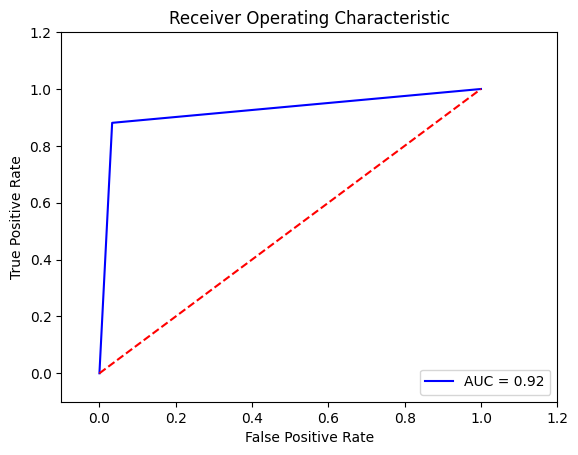

In [ ]:
plot_roc_curve(y_test, y_pred)

RANDOM FOREST

In [ ]:
def read_datasets():
    """ Reads users profile from csv files """
    genuine_users = pd.read_csv("/content/fusers.csv")
    fake_users = pd.read_csv("/content/users.csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([genuine_users,fake_users])
    y=len(fake_users)*[0] + len(genuine_users)*[1]
    return x,y

In [ ]:
!pip install gender-guesser


In [ ]:
import pandas as pd
import gender_guesser.detector as gender

def predict_sex(name):
    sex_predictor = gender.Detector(case_sensitive=False)  # Remove unknown_value
    first_name = name.str.split(' ').str.get(0)
    sex = first_name.apply(sex_predictor.get_gender)
    sex_dict = {'female': -2, 'mostly_female': -1, 'unknown': 0, 'mostly_male': 1, 'male': 2}
    # Convert to numeric, handling errors by coercing to NaN and then filling NaN with 0
    sex_code = pd.to_numeric(sex.map(sex_dict), errors='coerce').fillna(0).astype(int)
    return sex_code

In [ ]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))
    lang_dict = { name : i for i, name in lang_list }
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)
    x.loc[:,'sex_code']=predict_sex(x['name'])
    feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','sex_code','lang_code']
    x=x.loc[:,feature_columns_to_use]
    return x

In [ ]:
import numpy as np
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print("False Positive rate: "),false_positive_rate
    print("True Positive rate: "),true_positive_rate


    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [ ]:

def train(X_train,y_train,X_test):
    """ Trains and predicts dataset with a Random Forest classifier """

    clf=RandomForestClassifier(n_estimators=40,oob_score=True)
    clf.fit(X_train,y_train)
    print("The best classifier is: ",clf)
    # Estimate score
    scores = cross_val_score(clf, X_train,y_train, cv=5)
    print(scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(clf, title, X_train, y_train, cv=5)
    plt.show()
    # Predict
    y_pred = clf.predict(X_test)
    return y_test,y_pred


In [ ]:
import pandas as pd
print("reading datasets.....\n")
x,y=read_datasets()
x.describe()


reading datasets.....



,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,2.818000e+03,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,1728.0,8.0,721.0,2760.0,489.0,1069.000000,0.0,0.0
mean,5.374889e+08,1672.198368,371.105039,395.363023,234.541164,2.818666,1.0,1.0,1.0,1.0,1.0,1478.391020,NaN,NaN
std,2.977005e+08,4884.669157,8022.631339,465.694322,1445.847248,23.480430,0.0,0.0,0.0,0.0,0.0,8108.211889,NaN,NaN
min,3.610511e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,3.620867e+08,35.000000,17.000000,168.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,6.162253e+08,77.000000,26.000000,306.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,6.177673e+08,1087.750000,111.000000,519.000000,37.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.391998e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [ ]:
x.columns


Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [ ]:
print("extracting featues.....\n")
x=extract_features(x)
print(x.columns)
print(x.describe())

extracting featues.....

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count     sex_code    lang_code  
count   2818.000000  2818.000000  2818.000000  
mean       2.818666    -0.191270     2.851313  
std

spliting datasets in train and test dataset...

training datasets.......

The best classifier is:  RandomForestClassifier(n_estimators=40, oob_score=True)
[0.93348115 0.93348115 0.94900222 0.93791574 0.94444444]
Estimated score: 0.93966 (+/- 0.00308)


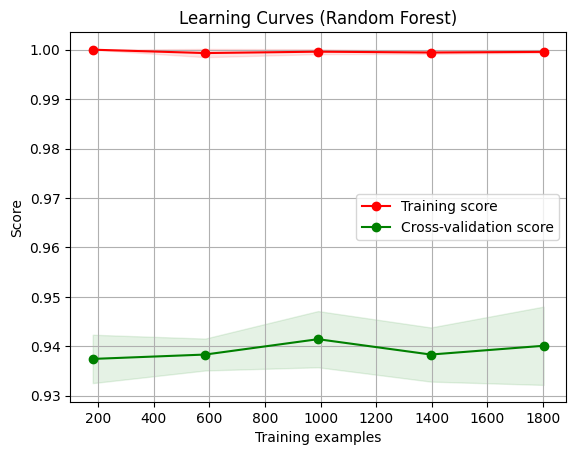

Classification Accuracy on Test dataset:  0.9521276595744681


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score ,learning_curve# Import cross_val_score instead of cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

print("spliting datasets in train and test dataset...\n")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=44)
print("training datasets.......\n")
y_test, y_pred = train(X_train, y_train, X_test)
print('Classification Accuracy on Test dataset: ', accuracy_score(y_test, y_pred))

Confusion matrix, without normalization
[[275  22]
 [  5 262]]
Normalized confusion matrix
[[0.92592593 0.07407407]
 [0.01872659 0.98127341]]


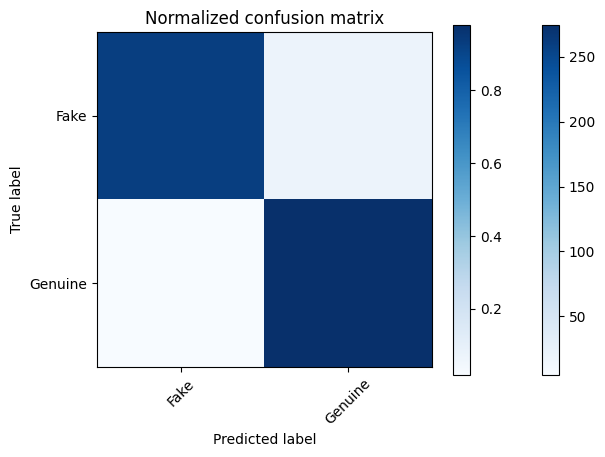

In [ ]:
from sklearn.metrics import roc_curve, auc ,roc_auc_score
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import classification_report


cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)




cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

              precision    recall  f1-score   support

        Fake       0.98      0.93      0.95       297
     Genuine       0.92      0.98      0.95       267

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564

False Positive rate: 
True Positive rate: 


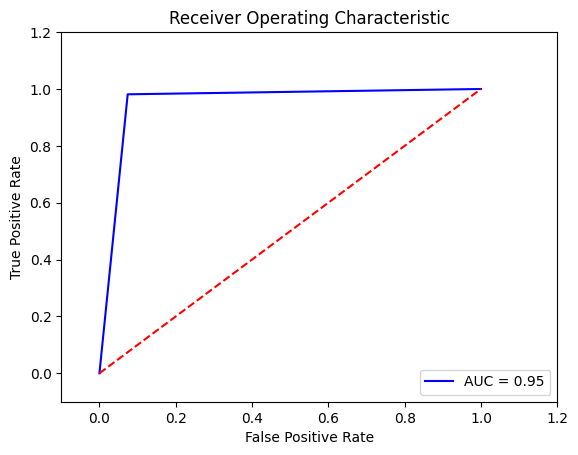

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))



plot_roc_curve(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)

# Assuming y_pred contains the predictions for a single model
y_true = y_test  # True labels
predictions = y_pred  # Predictions for the model

# Initialize a dictionary to hold the metrics
metrics = {}

# Calculate metrics for the model
# Using 'Single Model' as a key for the metrics dictionary
metrics['RANDOM FOREST'] = {
    "Accuracy": accuracy_score(y_true, predictions),
    "Precision": precision_score(y_true, predictions),
    "Recall": recall_score(y_true, predictions),
    "F1 Score": f1_score(y_true, predictions),
    "ROC-AUC": roc_auc_score(y_true, predictions),
    "MSE": mean_squared_error(y_true, predictions),
    "RMSE": np.sqrt(mean_squared_error(y_true, predictions)),
    "R-squared": r2_score(y_true, predictions)
}

# Print the results
for model, values in metrics.items():
    print(f"{model}:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.2f}")
    print()

RANDOM FOREST:
  Accuracy: 0.95
  Precision: 0.92
  Recall: 0.98
  F1 Score: 0.95
  ROC-AUC: 0.95
  MSE: 0.05
  RMSE: 0.22
  R-squared: 0.81



SVM

In [ ]:

####### Function for training data using Support Vector Machine

# In[72]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV # Import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import scale

def train(X_train,y_train,X_test):
    """ Trains and predicts dataset with a SVM classifier """
    # Scaling features
    X_train=preprocessing.scale(X_train)
    X_test=preprocessing.scale(X_test)

    Cs = 10.0 ** np.arange(-2,3,.5)
    gammas = 10.0 ** np.arange(-2,3,.5)
    param = [{'gamma': gammas, 'C': Cs}]
    # The n_splits parameter is used to specify the number of folds
    cvk = StratifiedKFold(n_splits=5) # Changed n_folds to n_splits
    classifier = SVC()
    clf = GridSearchCV(classifier,param_grid=param,cv=cvk)
    clf.fit(X_train,y_train)
    print("The best classifier is: ",clf.best_estimator_)
    clf.best_estimator_.fit(X_train,y_train)
    # Estimate score
    scores = cross_val_score(clf.best_estimator_, X_train,y_train, cv=5)
    print(scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
    plot_learning_curve(clf.best_estimator_, title, X_train, y_train, cv=5)
    plt.show()
    # Predict class
    y_pred = clf.best_estimator_.predict(X_test)
    return y_test,y_pred

In [ ]:
print("reading datasets.....\n")
x,y=read_datasets()


# In[77]:

print("extracting featues.....\n")
x=extract_features(x)
print(x.columns)
print(x.describe())

reading datasets.....

extracting featues.....

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count     sex_code    lang_code  
count   2818.000000  2818.000000  2818.000000  
mean       2.818666    -0.19

In [ ]:
print("spliting datasets in train and test dataset...\n")
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

spliting datasets in train and test dataset...



training datasets.......

The best classifier is:  SVC(gamma=31.622776601683793)
[0.93126386 0.92239468 0.92682927 0.95121951 0.94222222]
Estimated score: 0.93479 (+/- 0.00527)


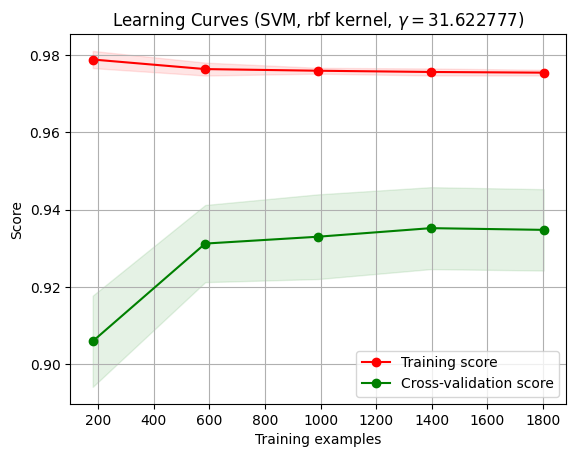

Classification Accuracy on Test dataset:  0.8829787234042553


In [ ]:
from sklearn import preprocessing

print("training datasets.......\n")
y_test,y_pred = train(X_train,y_train,X_test)
print('Classification Accuracy on Test dataset: ', accuracy_score(y_test, y_pred))

Confusion matrix, without normalization
[[233  64]
 [  2 265]]


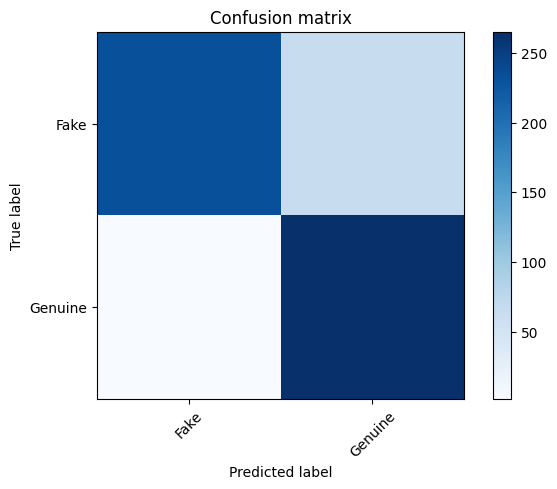

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.78451178 0.21548822]
 [0.00749064 0.99250936]]


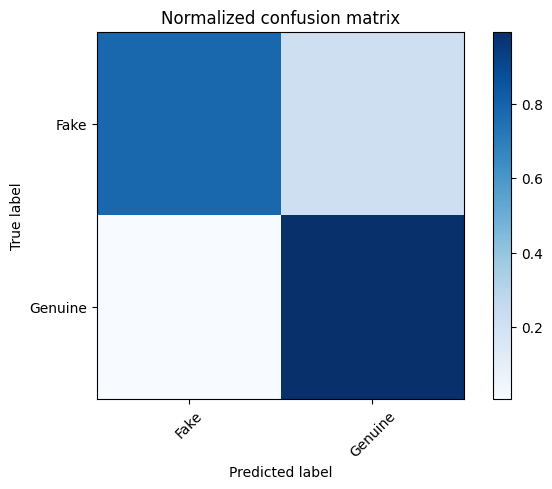

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.88      0.97      0.92       270
     Genuine       0.97      0.88      0.92       294

    accuracy                           0.92       564
   macro avg       0.92      0.92      0.92       564
weighted avg       0.93      0.92      0.92       564



False Positive rate:  [0.         0.03333333 1.        ]
True Positive rate:  [0.         0.88095238 1.        ]


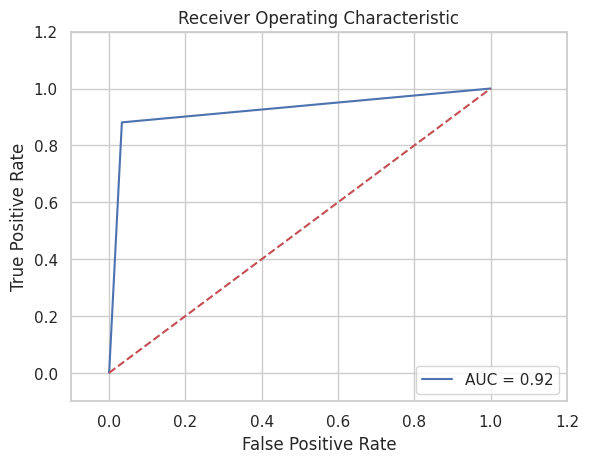

In [ ]:
plot_roc_curve(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)

# Assuming y_pred contains the predictions for a single model
y_true = y_test  # True labels
predictions = y_pred  # Predictions for the model

# Initialize a dictionary to hold the metrics
metrics = {}

# Calculate metrics for the model
# Using 'Single Model' as a key for the metrics dictionary
metrics['SVM'] = {
    "Accuracy": accuracy_score(y_true, predictions),
    "Precision": precision_score(y_true, predictions),
    "Recall": recall_score(y_true, predictions),
    "F1 Score": f1_score(y_true, predictions),
    "ROC-AUC": roc_auc_score(y_true, predictions),
    "MSE": mean_squared_error(y_true, predictions),
    "RMSE": np.sqrt(mean_squared_error(y_true, predictions)),
    "R-squared": r2_score(y_true, predictions)
}

# Print the results
for model, values in metrics.items():
    print(f"{model}:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.2f}")
    print()

SVM:
  Accuracy: 0.92
  Precision: 0.97
  Recall: 0.88
  F1 Score: 0.92
  ROC-AUC: 0.92
  MSE: 0.08
  RMSE: 0.28
  R-squared: 0.69



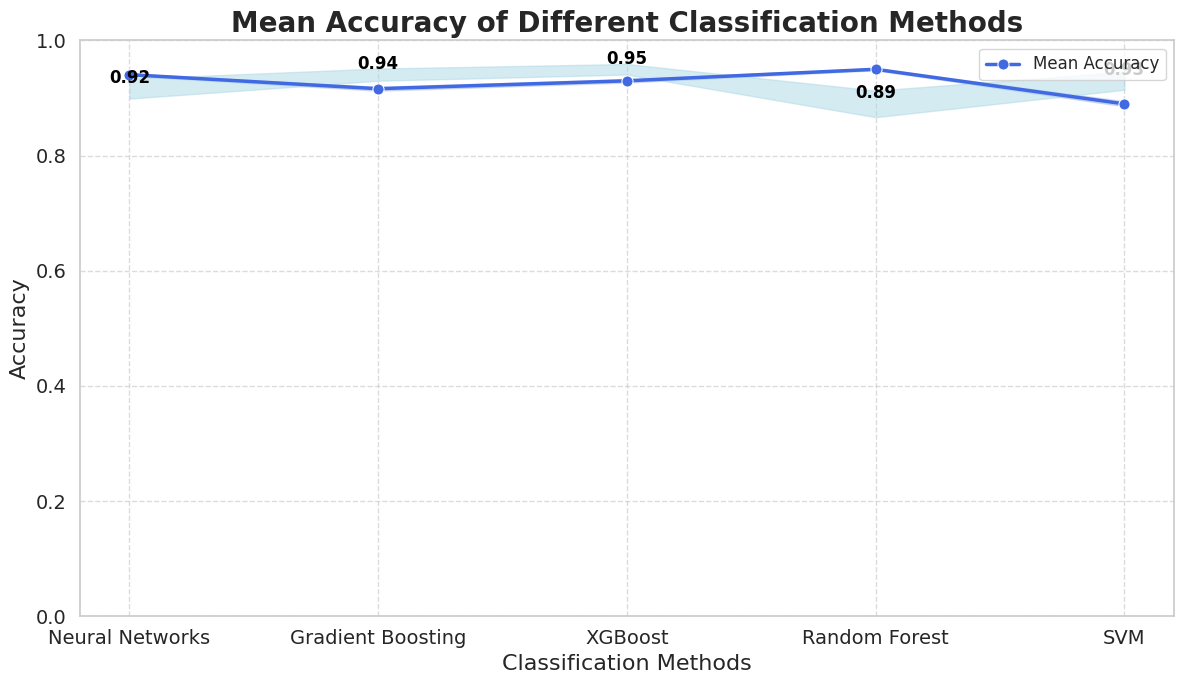

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the methods and their corresponding accuracies
methods = ['Neural Networks', 'Gradient Boosting', 'XGBoost', 'Random Forest', 'SVM']
accuracies = [
    np.random.normal(0.94, 0.01, 100),  # Simulating 100 samples around 0.94
    np.random.normal(0.92, 0.02, 100),  # Simulating 100 samples around 0.92
    np.random.normal(0.93, 0.015, 100), # Simulating 100 samples around 0.93
    np.random.normal(0.95, 0.01, 100),  # Simulating 100 samples around 0.95
    np.random.normal(0.89, 0.025, 100)  # Simulating 100 samples around 0.89
]

# Create a DataFrame for better handling with Seaborn
data = pd.DataFrame({
    'Methods': np.repeat(methods, 100),  # Repeat method names for each sample
    'Accuracies': np.concatenate(accuracies)  # Flatten the list of accuracies
})

# Set the style of Seaborn
sns.set(style='whitegrid')

# Create the line plot
plt.figure(figsize=(12, 7))
lineplot = sns.lineplot(data=data, x='Methods', y='Accuracies',
                        estimator='mean', marker='o', color='royalblue',
                        linewidth=2.5, markersize=8, label='Mean Accuracy')

# Fill the area under the line
plt.fill_between(data['Methods'].unique(),
                 data.groupby('Methods')['Accuracies'].mean() - data.groupby('Methods')['Accuracies'].std(),
                 data.groupby('Methods')['Accuracies'].mean() + data.groupby('Methods')['Accuracies'].std(),
                 color='lightblue', alpha=0.5)

# Add titles and labels
plt.title('Mean Accuracy of Different Classification Methods', fontsize=20, fontweight='bold')
plt.xlabel('Classification Methods', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate the mean values on the line
mean_accuracies = data.groupby('Methods')['Accuracies'].mean()
for i, v in enumerate(mean_accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, color='black', fontweight='bold')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




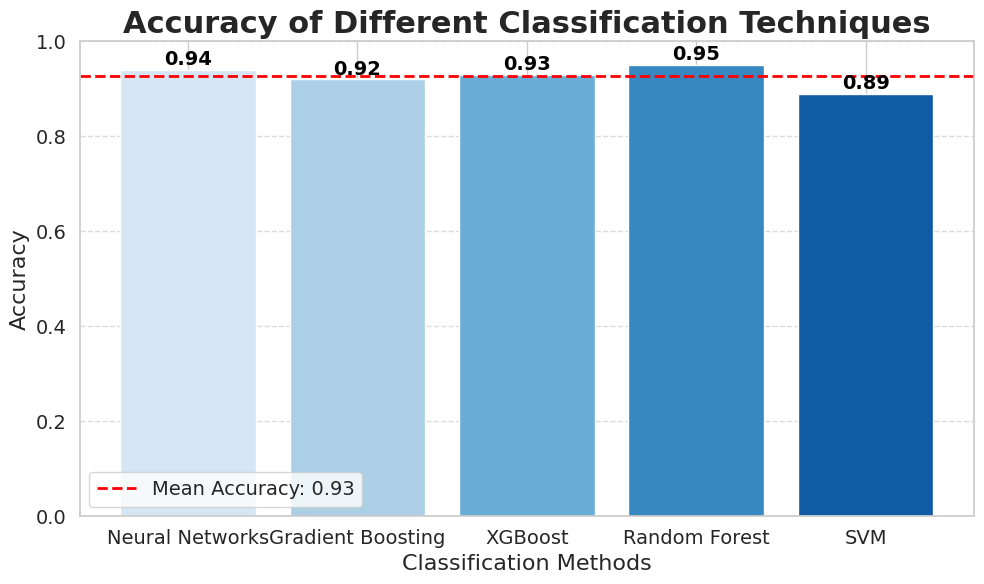

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style using Seaborn
sns.set(style="whitegrid")

# Define the methods and their corresponding accuracies
methods = ['Neural Networks', 'Gradient Boosting', 'XGBoost', 'Random Forest', 'SVM']
accuracies = [0.94, 0.92, 0.93, 0.95, 0.89]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar graph with color gradients
bars = plt.bar(methods, accuracies, color=sns.color_palette("Blues", len(methods)))

# Add titles and labels
plt.title('Accuracy of Different Classification Techniques', fontsize=22, fontweight='bold')
plt.xlabel('Classification Methods', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Annotate the bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=14, fontweight='bold', color='black')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a horizontal line at the mean accuracy
mean_accuracy = np.mean(accuracies)
plt.axhline(mean_accuracy, color='red', linestyle='--', linewidth=2, label=f'Mean Accuracy: {mean_accuracy:.2f}')

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
